<a href="https://colab.research.google.com/github/pseudope/Parrot_5th_Level1/blob/main/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install einops
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.data import Dataset
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, BatchNormalization
from einops import rearrange
from sklearn.model_selection import train_test_split

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


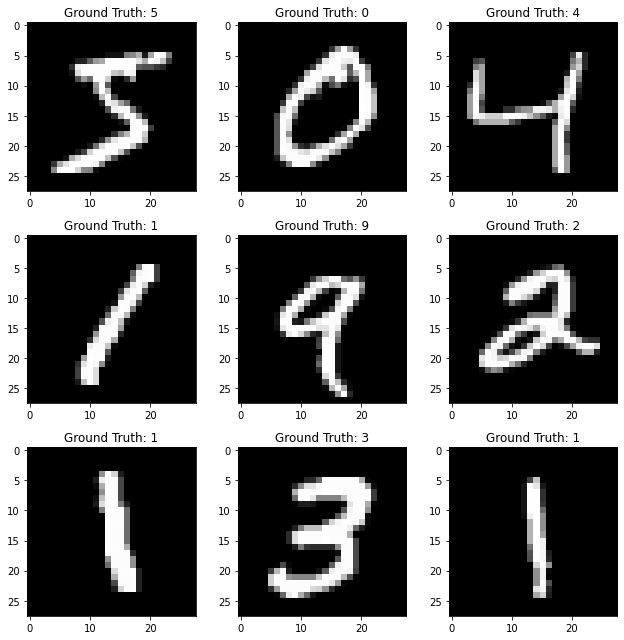

In [31]:
fig = plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap="gray", interpolation="none")
    target = y_train[i]
    plt.title("Ground Truth: {}".format(int(target)))

plt.show()

In [32]:
target_size = 10   #


X_train = rearrange(X_train, "b h w -> b h w 1")
X_test = rearrange(X_test, "b h w -> b h w 1")

X_train = X_train.astype("float32") / (2 ** 8 - 1)   
X_test = X_test.astype("float32") / (2 ** 8 - 1)    

y_train = to_categorical(y_train, target_size)    
y_test = to_categorical(y_test, target_size)   

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [34]:
inputs = Input(shape=(28, 28, 1))  

X = Conv2D(filters=512, kernel_size=(3, 3), padding="Same")(inputs)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(filters=512, kernel_size=(3, 3), padding="Same", activation="relu")(X)
X = Dropout(0.5)(X)
X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)

X = Conv2D(filters=256, kernel_size=(3, 3), padding="Same")(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(filters=128, kernel_size=(3, 3), padding="Same", activation="relu")(X)
X = Dropout(0.5)(X)
X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)

X = Conv2D(filters=64, kernel_size=(3, 3), padding="Same")(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu")(X)
X = Dropout(0.3)(X)
X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)

X = Flatten()(X)
X = Dense(1024, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.2)(X)
X = Dense(256, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.2)(X)
outputs = Dense(10, activation="softmax")(X)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 512)       5120      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 512)       2048      
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 512)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 512)       2359808   
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 512)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 512)       0   

In [36]:
model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=256, epochs=15, validation_data=(X_val, y_val), verbose=1)

Epoch 1/15
188/188 [==============================] - 146s 770ms/step - loss: 0.5284 - accuracy: 0.8334 - val_loss: 2.6750 - val_accuracy: 0.0900
Epoch 2/15
188/188 [==============================] - 144s 766ms/step - loss: 0.1582 - accuracy: 0.9516 - val_loss: 3.1436 - val_accuracy: 0.1989
Epoch 3/15
188/188 [==============================] - 145s 772ms/step - loss: 0.1154 - accuracy: 0.9658 - val_loss: 2.5511 - val_accuracy: 0.2023
Epoch 4/15
188/188 [==============================] - 145s 774ms/step - loss: 0.0943 - accuracy: 0.9706 - val_loss: 1.1364 - val_accuracy: 0.5572
Epoch 5/15
188/188 [==============================] - 145s 774ms/step - loss: 0.0792 - accuracy: 0.9755 - val_loss: 0.8886 - val_accuracy: 0.7013
Epoch 6/15
188/188 [==============================] - 145s 774ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.6781 - val_accuracy: 0.8023
Epoch 7/15
188/188 [==============================] - 145s 774ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.7677 -

In [37]:
model.evaluate(X_test, y_test, batch_size=256)

40/40 [==============================] - 10s 253ms/step - loss: 0.2791 - accuracy: 0.9565


[0.2791149914264679, 0.9564999938011169]